In [1]:
#Credit Card Fraud Detection

In [2]:
#Detect fraudulent credit card transactions using machine learning models.

In [3]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
#Importing Data
df=pd.read_csv('creditcard.csv')

In [6]:
#Lets checkout whats there in our dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [8]:
#Lets check some statistics
print(df.describe())

                Time             V1             V2             V3  \
count  168486.000000  168486.000000  168486.000000  168486.000000   
mean    60256.111202      -0.176789       0.044449       0.509615   
std     27123.040842       1.847361       1.609052       1.376526   
min         0.000000     -56.407510     -72.715728     -33.680984   
25%     40964.000000      -0.990038      -0.535327      -0.040990   
50%     60221.000000      -0.192225       0.112558       0.635292   
75%     77993.000000       1.181787       0.806294       1.303683   
max    119247.000000       2.439207      22.057729       9.382558   

                  V4             V5             V6             V7  \
count  168486.000000  168486.000000  168486.000000  168486.000000   
mean        0.121591      -0.183041       0.060005      -0.084165   
std         1.369688       1.334885       1.293541       1.205978   
min        -5.519697     -42.147898     -26.160506     -43.557242   
25%        -0.738416      -0.8341

In [9]:
#Lets check for missing values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [10]:
#Removing missing values
df = df.dropna(how='any',axis=0)

In [11]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [12]:
#No missing value. Lets check the datatype.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 168485 entries, 0 to 168484
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    168485 non-null  float64
 1   V1      168485 non-null  float64
 2   V2      168485 non-null  float64
 3   V3      168485 non-null  float64
 4   V4      168485 non-null  float64
 5   V5      168485 non-null  float64
 6   V6      168485 non-null  float64
 7   V7      168485 non-null  float64
 8   V8      168485 non-null  float64
 9   V9      168485 non-null  float64
 10  V10     168485 non-null  float64
 11  V11     168485 non-null  float64
 12  V12     168485 non-null  float64
 13  V13     168485 non-null  float64
 14  V14     168485 non-null  float64
 15  V15     168485 non-null  float64
 16  V16     168485 non-null  float64
 17  V17     168485 non-null  float64
 18  V18     168485 non-null  float64
 19  V19     168485 non-null  float64
 20  V20     168485 non-null  float64
 21  V21     168485 

Class
0.0    168125
1.0       360
Name: count, dtype: int64


<Axes: xlabel='Class', ylabel='count'>

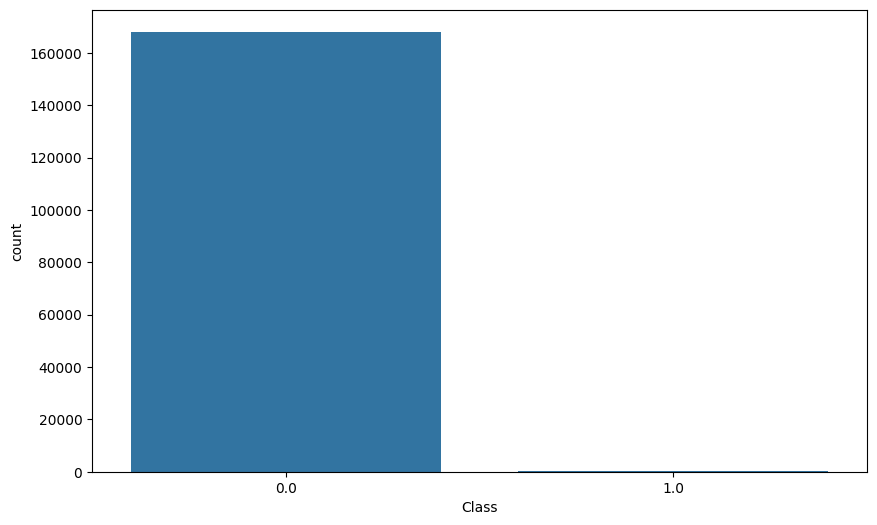

In [13]:
#Lets have a look at data balance
print(df['Class'].value_counts())
plt.figure(figsize=(10,6))
sns.countplot(x="Class", data=df)

In [14]:
#We can clearly visualize, data is imbalanced

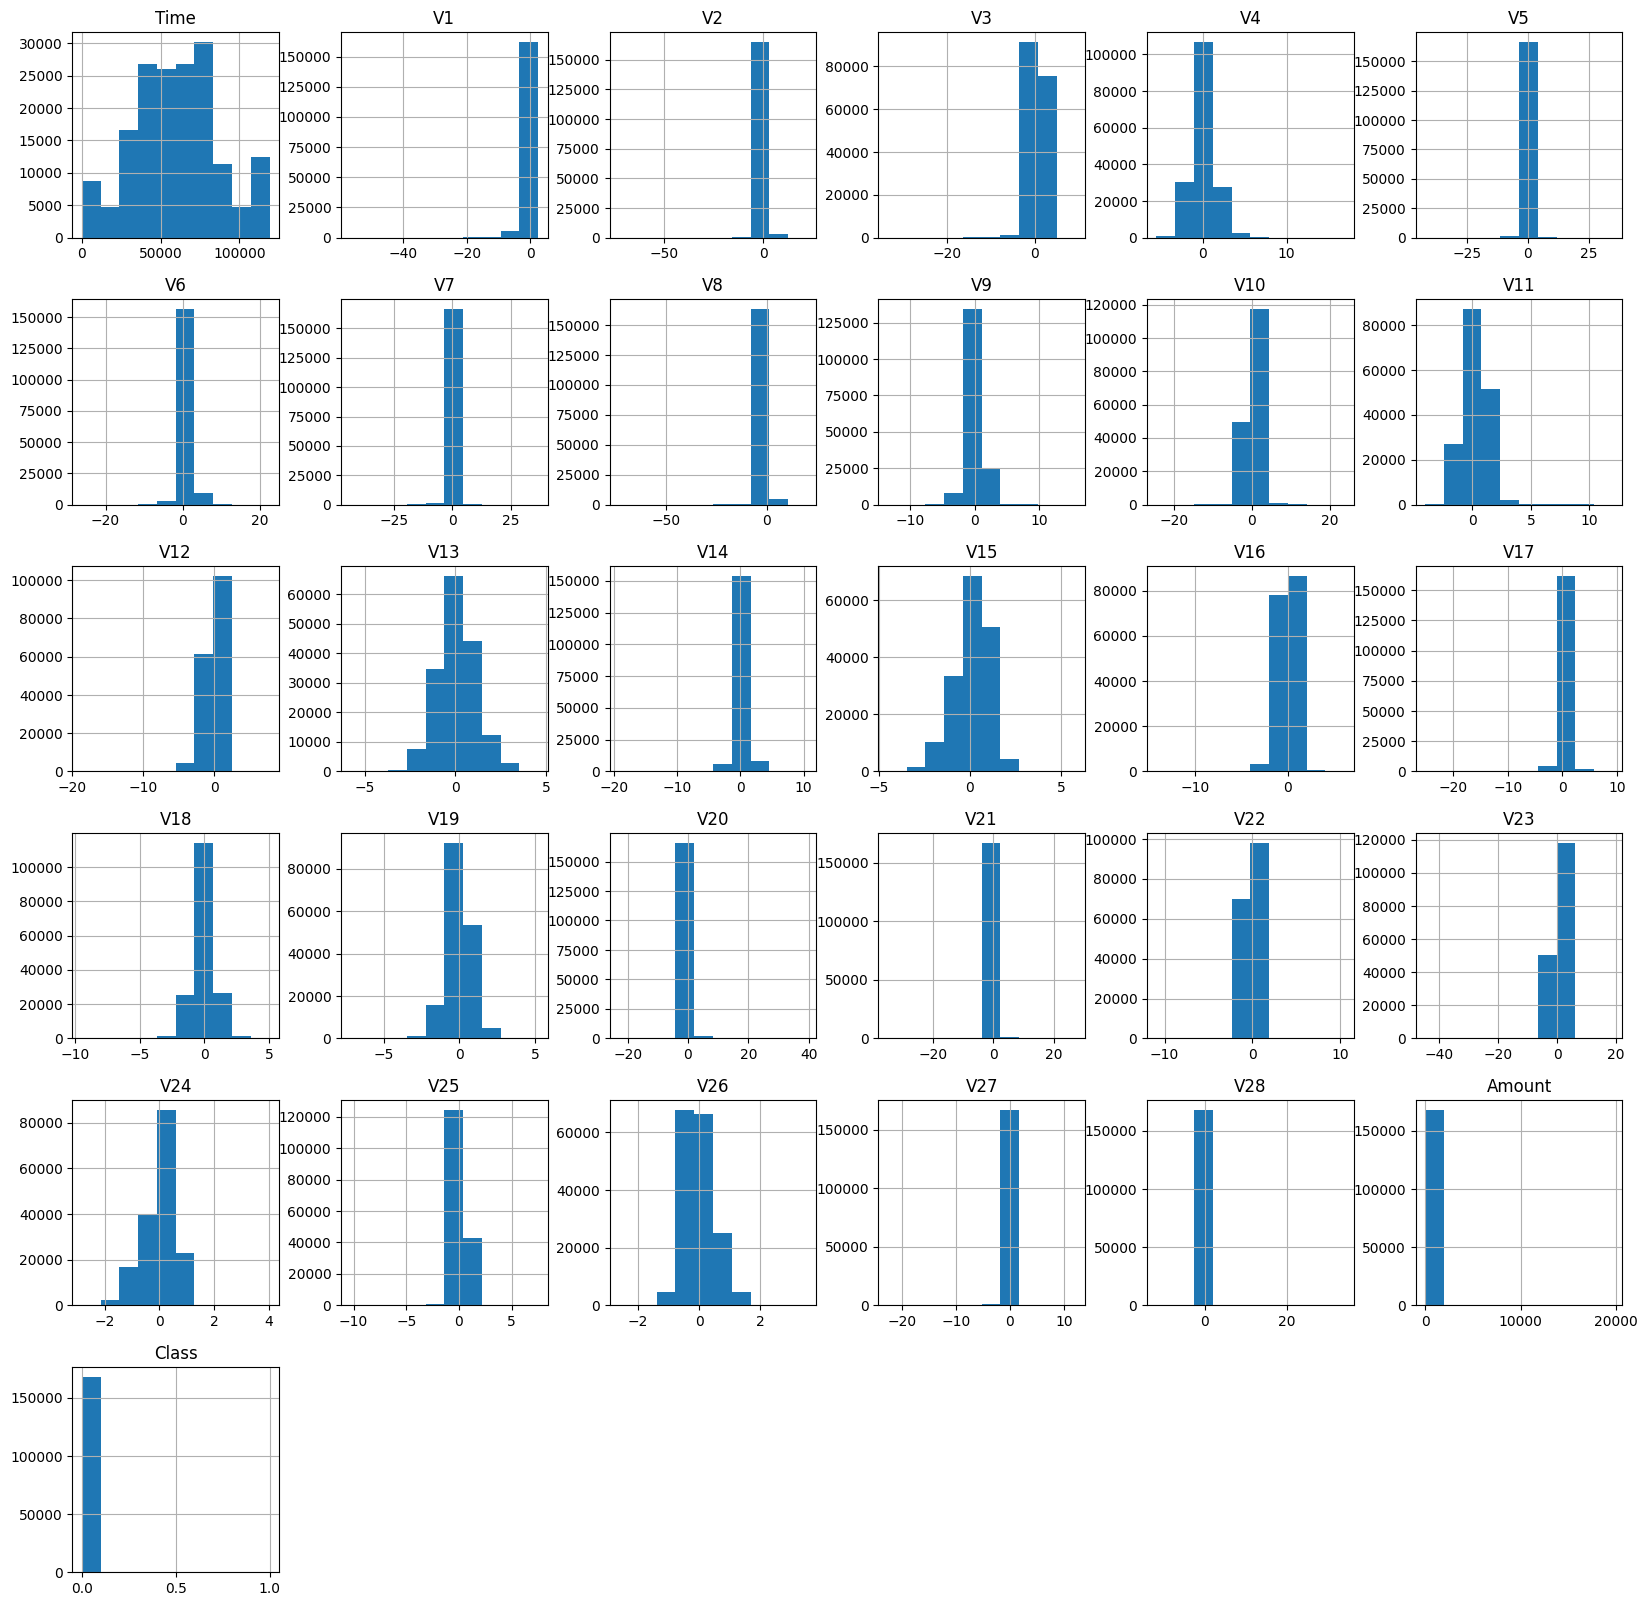

In [15]:
#some visualizations
df.hist(figsize=(20, 20))
plt.show()

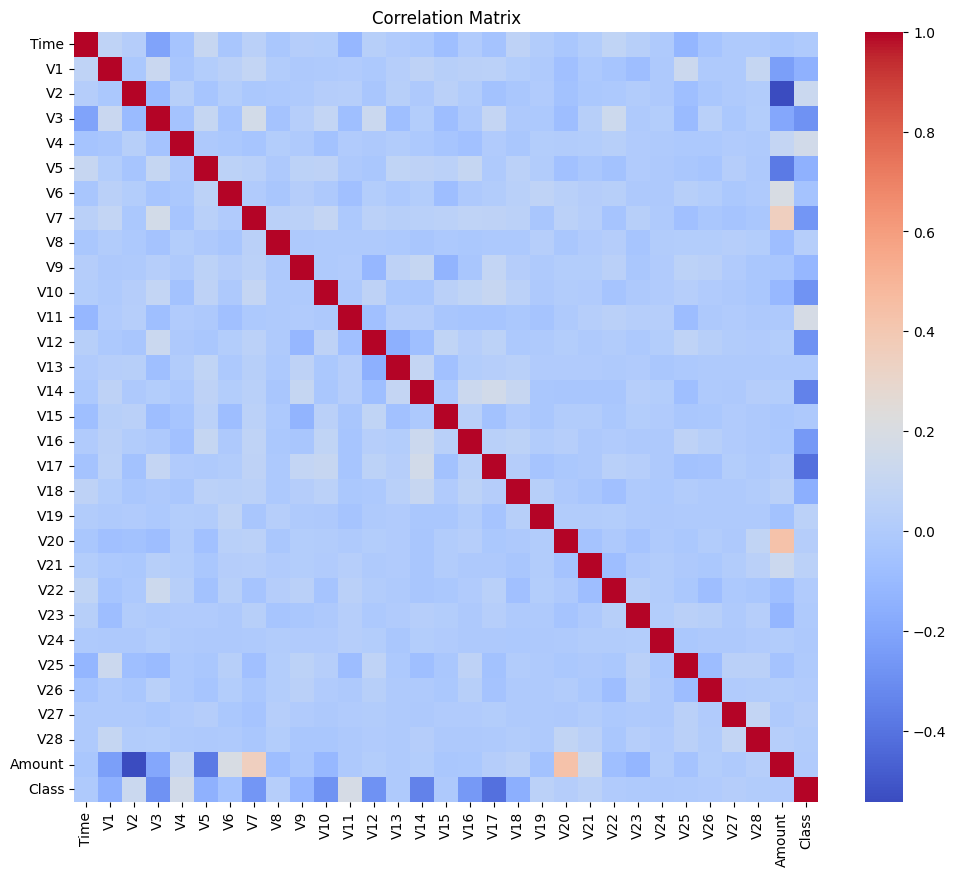

Class     1.000000
V11       0.182866
V4        0.161069
V2        0.125458
V21       0.051217
V19       0.048825
V8        0.026735
V20       0.023923
V27       0.021345
V28       0.007518
Amount    0.004658
V22       0.004237
V26       0.002450
V23      -0.001169
V25      -0.001511
V13      -0.003361
Time     -0.006153
V24      -0.006426
V15      -0.010587
V6       -0.053546
V9       -0.115658
V5       -0.145070
V1       -0.146534
V18      -0.157865
V16      -0.258406
V7       -0.266017
V10      -0.278147
V3       -0.285277
V12      -0.287752
V14      -0.348169
V17      -0.414967
Name: Class, dtype: float64


In [16]:
#Lets perform correlation analysis
# Correlation matrix
corr_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

corr_target = corr_matrix['Class'].sort_values(ascending=False)
print(corr_target)

In [17]:
#No significance correlation

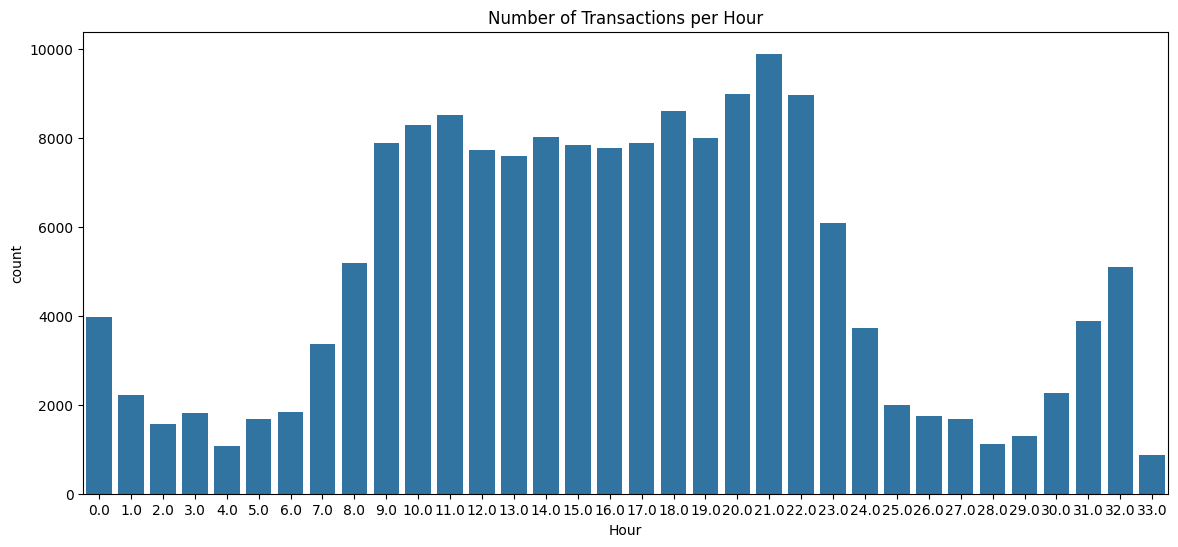

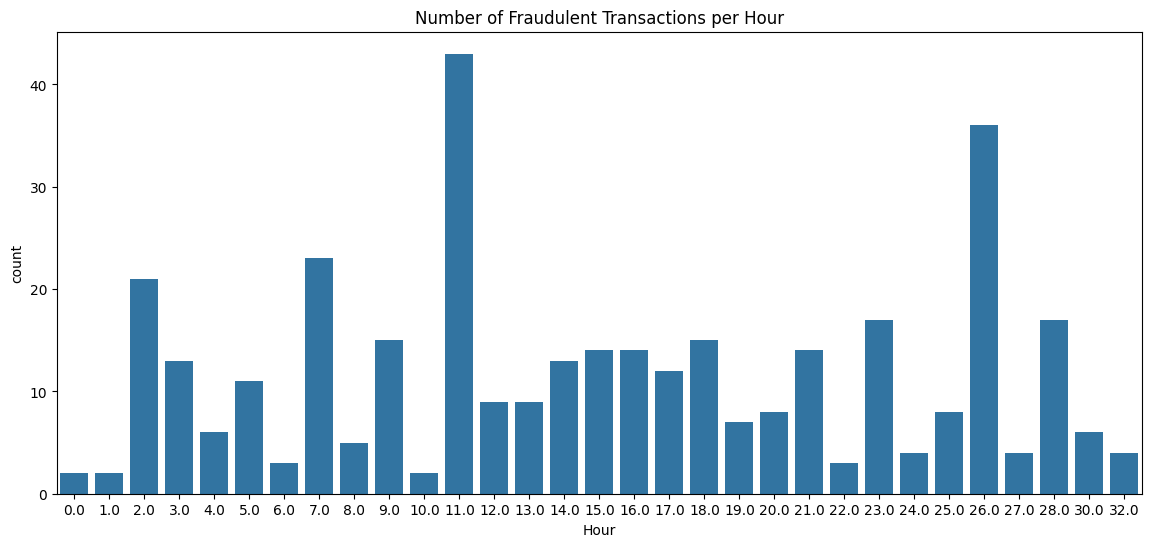

In [20]:
#Time based analysis
#Since we have data with respect to time, lets plot some data time based
df['Hour'] = df['Time'] // 3600

#Number of transactions per hour
plt.figure(figsize=(14, 6))
sns.countplot(x='Hour', data=df)
plt.title('Number of Transactions per Hour')
plt.show()

#Number of fraudulent transactions per hour
fraud = df[df['Class'] == 1]
plt.figure(figsize=(14, 6))
sns.countplot(x='Hour', data=fraud)
plt.title('Number of Fraudulent Transactions per Hour')
plt.show()

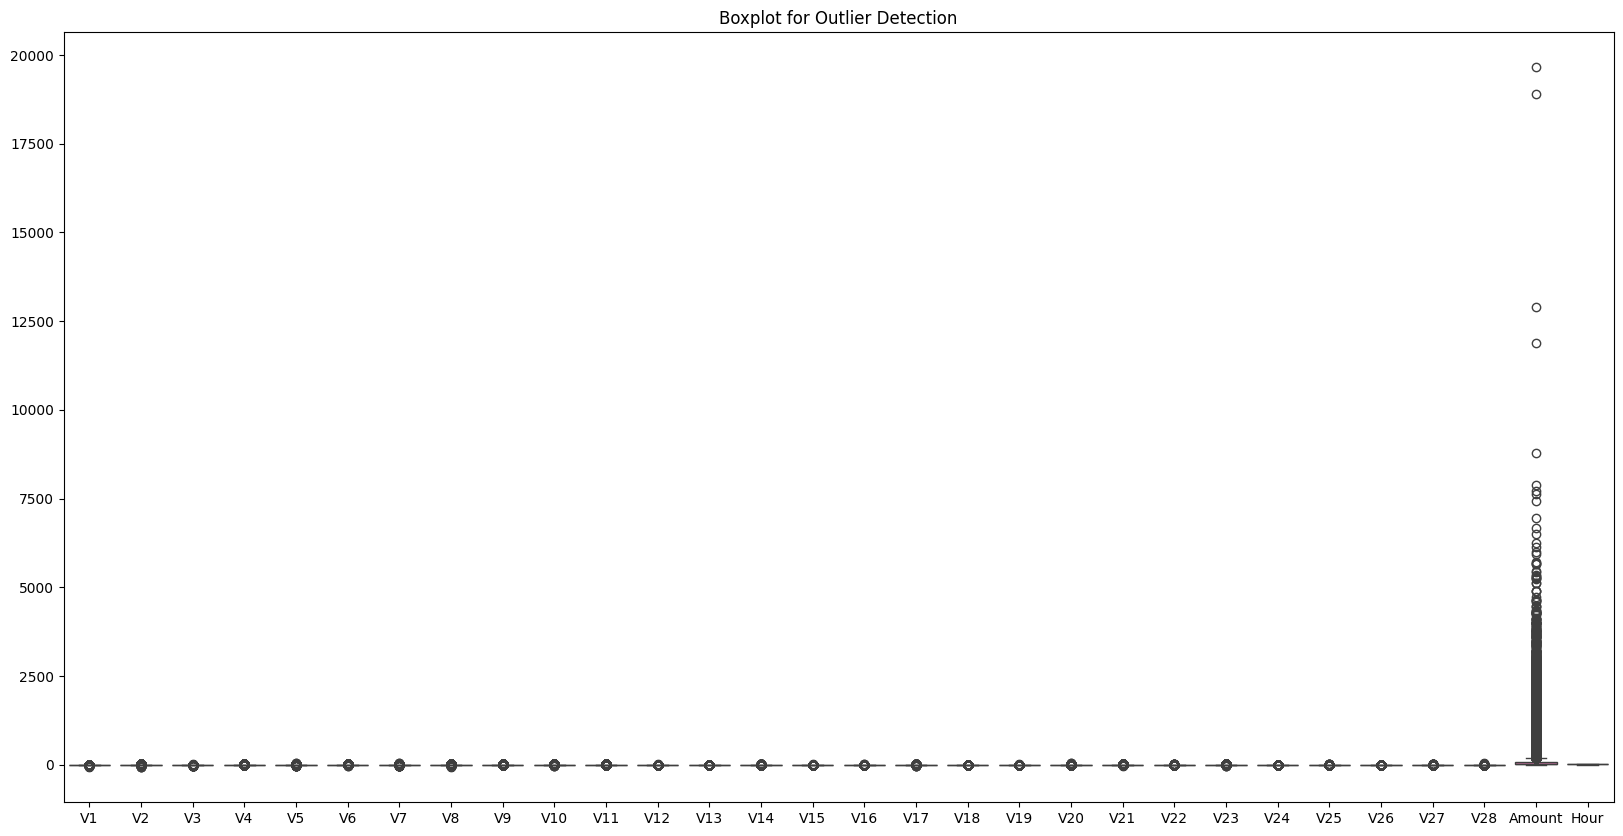

In [21]:
#Lets check for outliers
# Boxplot for outlier detection
plt.figure(figsize=(20, 10))
sns.boxplot(data=df.drop(columns=['Class', 'Time']))
plt.title('Boxplot for Outlier Detection')
plt.show()

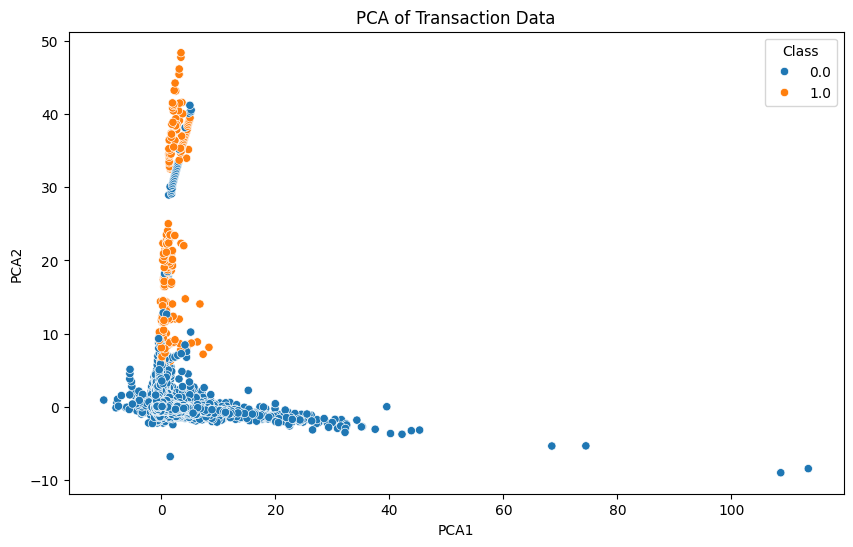

In [22]:
#Lets visualize high dimensional data using PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df = scaler.fit_transform(df.drop(columns=['Class', 'Time']))

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_df)

df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Class', data=df)
plt.title('PCA of Transaction Data')
plt.show()

In [23]:
#Lets begin with data preprocessing. It place a very important role before training. Lets import some required libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [26]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V24,V25,V26,V27,V28,Amount,Class,Hour,PCA1,PCA2
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0,0.0,0.461320,-0.171185
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0,0.0,-0.394260,0.064860
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0,0.0,1.885873,-0.216874
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0,0.0,0.339455,-0.506023
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0,0.0,0.164918,-0.093964


In [27]:
df= df.drop(columns= ['Hour', 'PCA1', 'PCA2'])

In [28]:
X= df.drop(columns=['Class'])
y= df['Class']

In [29]:
#Lets split the data for training and testing purpose
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state= 42)

In [30]:
#Lets scale down X_train and X_test using Standard Scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
#Imbalance Data handling using SMOTE
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [32]:
#Lets begin Model Training
#Anomaly Detection
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
isofor= IsolationForest(contamination= 0.01)
isofor.fit(X_train)
y_pred= isofor.predict(X_test)

In [33]:
#Neural Networks
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build a neural network model
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
y_pred_nn = model.predict(X_test)


Epoch 1/10
6725/6725 [==============================] - 18s 3ms/step - loss: 0.0564 - accuracy: 0.9786 - val_loss: 0.0290 - val_accuracy: 0.9949
Epoch 2/10
6725/6725 [==============================] - 21s 3ms/step - loss: 0.0116 - accuracy: 0.9973 - val_loss: 0.0091 - val_accuracy: 1.0000
Epoch 3/10
6725/6725 [==============================] - 18s 3ms/step - loss: 0.0066 - accuracy: 0.9985 - val_loss: 0.0045 - val_accuracy: 1.0000
Epoch 4/10
6725/6725 [==============================] - 18s 3ms/step - loss: 0.0047 - accuracy: 0.9990 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 5/10
6725/6725 [==============================] - 18s 3ms/step - loss: 0.0036 - accuracy: 0.9993 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 6/10
6725/6725 [==============================] - 21s 3ms/step - loss: 0.0034 - accuracy: 0.9994 - val_loss: 8.0503e-04 - val_accuracy: 1.0000
Epoch 7/10
6725/6725 [==============================] - 17s 3ms/step - loss: 0.0028 - accuracy: 0.9994 - val_loss: 0.0024 - va

In [34]:
#Accuracy= 99.96%, great job

In [35]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Decision Tree for classification
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred_dt = dtree.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))
print(accuracy_score(y_test, y_pred_dt))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     33625
         1.0       0.51      0.85      0.64        72

    accuracy                           1.00     33697
   macro avg       0.75      0.92      0.82     33697
weighted avg       1.00      1.00      1.00     33697

[[33566    59]
 [   11    61]]
0.9979226637386117


In [36]:
#Accuracy Score: 99.79

In [37]:
#Lets check the accuracy with test data that we have
#Lets check the accuracy with X_test that we have
new_data_predictions_dtree = dtree.predict(X_test)

for i in range(15):
    predicted_label = new_data_predictions_dtree[i]
    actual_label = y_test.iloc[i]

    print("Instance", i+1)
    print("Predicted Label:", predicted_label)
    print("Actual Label:", actual_label)
    print("✅" if predicted_label == actual_label else "❌")
    print()

Instance 1
Predicted Label: 0.0
Actual Label: 0.0
✅

Instance 2
Predicted Label: 0.0
Actual Label: 0.0
✅

Instance 3
Predicted Label: 0.0
Actual Label: 0.0
✅

Instance 4
Predicted Label: 0.0
Actual Label: 0.0
✅

Instance 5
Predicted Label: 0.0
Actual Label: 0.0
✅

Instance 6
Predicted Label: 0.0
Actual Label: 0.0
✅

Instance 7
Predicted Label: 0.0
Actual Label: 0.0
✅

Instance 8
Predicted Label: 0.0
Actual Label: 0.0
✅

Instance 9
Predicted Label: 0.0
Actual Label: 0.0
✅

Instance 10
Predicted Label: 0.0
Actual Label: 0.0
✅

Instance 11
Predicted Label: 0.0
Actual Label: 0.0
✅

Instance 12
Predicted Label: 0.0
Actual Label: 0.0
✅

Instance 13
Predicted Label: 0.0
Actual Label: 0.0
✅

Instance 14
Predicted Label: 0.0
Actual Label: 0.0
✅

Instance 15
Predicted Label: 0.0
Actual Label: 0.0
✅

